

"""
### Question:


#### Image Classification using the Celebrity Faces Dataset

You are tasked with designing an image classification architecture and using it to classify images from the Celebrity Faces Dataset, which consists of images belonging to 17 different celebrity classes. Follow the steps below to complete this task:

1. **Design an Image Classification Architecture**:
    - Create a convolutional neural network (CNN) architecture for image classification. The architecture should include:
        - Input layer suitable for the image size of the Celebrity Faces Dataset (images are generally around 474 pixels in one dimension).
        - Convolutional layers, pooling layers, and fully connected layers. Customize the number, type, and order of layers as you see fit.
        - Use suitable activation functions throughout the network.
        - Implement dropout or any other regularization techniques as needed.

2. **Compile the Model**:
    - Select an appropriate loss function and optimizer for multi-class classification.
    - Compile the model using your chosen parameters.

3. **Prepare and Split the Dataset**:
    - Load and preprocess the Celebrity Faces Dataset. Ensure to handle data augmentation if necessary.
    - Resize each image to a uniform size suitable for your model's input layer (e.g., resize images to 224x224 pixels).
    - Split the dataset into training and validation sets.

4. **Train the Model**:
    - Train the model using the training set of the Celebrity Faces Dataset.
    - Monitor the training process and adjust hyperparameters as needed.
    - Validate the model using the validation set.

5. **Evaluate the Model**:
    - Evaluate the performance of your model on the validation set.
    - Provide metrics such as accuracy, precision, recall, and F1-score.

6. **Classify New Images**:
    - During the exam, you will be provided with new images from the Celebrity Faces Dataset. Use your trained model to classify these images.
    - Report the predicted labels for the new images and discuss any challenges faced.

7. **Documentation and Analysis**:
    - Document your entire process, including:
        - Architecture design decisions.
        - Hyperparameter choices.
        - Training and evaluation procedures.
        - Results and analysis of the model's performance.

#### Notes:
- Utilize Python and a deep learning framework of your choice (e.g., TensorFlow, Keras) for implementing the CNN.
- The images in the Celebrity Faces Dataset should be resized to 224x224 pixels for consistency in input size.
- Ensure your code is well-structured and easy to follow, with clear comments where necessary.



Good luck with your preparation!
"""


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Loaded images shape: (1799, 224, 224, 3)
Loaded labels shape: /n Images with Folder name (1799,) /n Images with Folder name


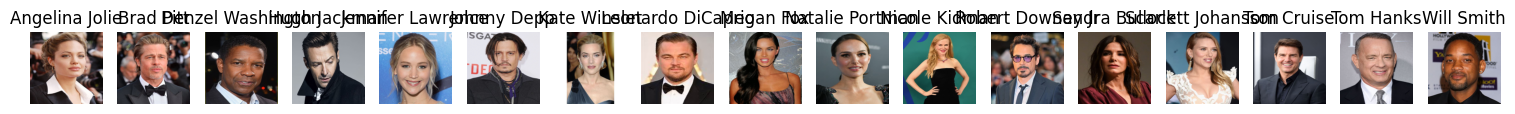

In [3]:
#Code for Loading the image
# Code for loading the dataset and plotting, with folder name

# first upload the dataset in google drive
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Set up the directory path where your dataset is located
dataset_directory = '/content/drive/MyDrive/Celebrity Faces Dataset'

# Function to load the dataset
def load_dataset(directory):
    images = []
    labels = []
    class_names = sorted(os.listdir(directory))  # Assumes each subdirectory is a class

    for i, class_name in enumerate(class_names):
        class_directory = os.path.join(directory, class_name)
        for filename in os.listdir(class_directory):
            if filename.endswith('.jpg') or filename.endswith('.png'):
                image_path = os.path.join(class_directory, filename)
                image = Image.open(image_path)
                image = image.resize((224, 224))  # Resize if necessary
                image = np.array(image) / 255.0  # Normalize pixel values to [0, 1]
                images.append(image)
                labels.append(i)  # Store index of the class

    images = np.array(images)
    labels = np.array(labels)

    return images, labels, class_names

# Usage example
images, labels, class_names = load_dataset(dataset_directory)

# Print shape of loaded data for verification
print("Loaded images shape:", images.shape)
print("Loaded labels shape: /n Images with Folder name", labels.shape, "/n Images with Folder name")

# Plotting example: Plot one example image from each class
num_classes = len(class_names)
fig, axes = plt.subplots(1, num_classes, figsize=(15, 3))

for i, class_name in enumerate(class_names):
    class_indices = np.where(labels == i)[0]
    example_image = images[class_indices[0]]
    axes[i].imshow(example_image)
    axes[i].set_title(class_name)
    axes[i].axis('off')

plt.tight_layout()
plt.show()


In [4]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import utils
import keras
import tensorflow as tf
from tensorflow.keras import layers, models, datasets

In [5]:
def create_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu', kernel_initializer='he_uniform'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

In [6]:
learning_rate = 0.001

model = create_model(images.shape[1:], len(class_names))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
train_images, val_images, train_labels, val_labels = train_test_split(images, labels, test_size=0.2, random_state=42)
batch_sizes = 32
epochss = 10
history = model.fit(train_images, train_labels,
                    batch_size=batch_sizes,
                    epochs=epochss,
                    validation_data=(val_images, val_labels))

Epoch 1/10
45/45 [==============================] - 167s 4s/step - loss: 3.1361 - accuracy: 0.0945 - val_loss: 2.8189 - val_accuracy: 0.1139
Epoch 2/10
45/45 [==============================] - 163s 4s/step - loss: 2.7669 - accuracy: 0.1300 - val_loss: 2.7019 - val_accuracy: 0.1500
Epoch 3/10
45/45 [==============================] - 174s 4s/step - loss: 2.4746 - accuracy: 0.2182 - val_loss: 2.5376 - val_accuracy: 0.1889
Epoch 4/10
45/45 [==============================] - 179s 4s/step - loss: 1.9854 - accuracy: 0.3753 - val_loss: 2.4188 - val_accuracy: 0.2722
Epoch 5/10
45/45 [==============================] - 186s 4s/step - loss: 1.4961 - accuracy: 0.5407 - val_loss: 2.5842 - val_accuracy: 0.2972
Epoch 6/10
45/45 [==============================] - 165s 4s/step - loss: 1.0131 - accuracy: 0.6852 - val_loss: 2.8620 - val_accuracy: 0.2778
Epoch 7/10
45/45 [==============================] - 173s 4s/step - loss: 0.7572 - accuracy: 0.7672 - val_loss: 3.1547 - val_accuracy: 0.2778
Epoch 8/10
45

12/12 [==============================] - 16s 1s/step - loss: 3.3469 - accuracy: 0.2750
Validation accuracy: 0.2750


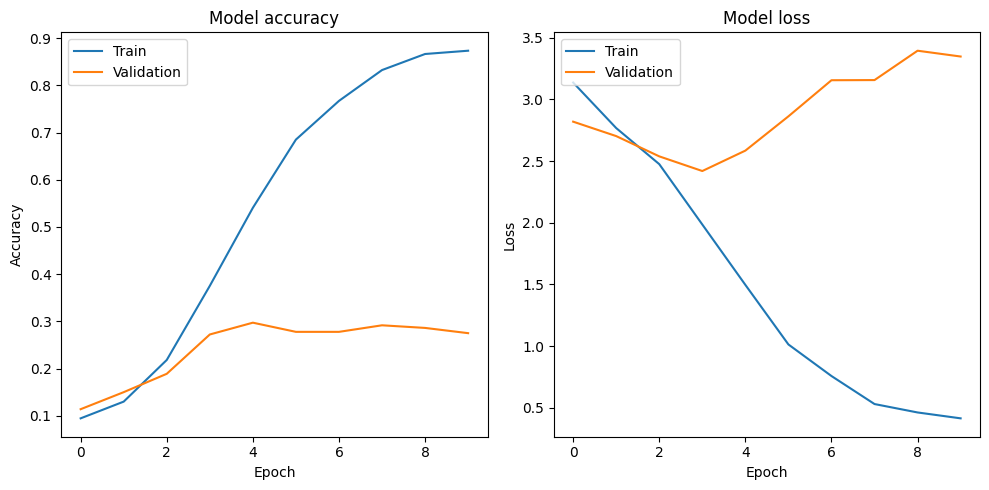

In [8]:
val_loss, val_acc = model.evaluate(val_images, val_labels)
print(f'Validation accuracy: {val_acc:.4f}')

# Plot training history
plt.figure(figsize=(10, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [9]:
def classify_image(image_path):
    image = Image.open(image_path)
    image = image.resize((224, 224))
    image = np.array(image) / 255.0
    image = np.expand_dims(image, axis=0)

    prediction = model.predict(image)
    predicted_class = class_names[np.argmax(prediction)]

    return predicted_class

new_image_path = '/content/drive/MyDrive/Celebrity Faces Dataset/Tom Cruise/004_dc64d954.jpg'
predicted_class = classify_image(new_image_path)
print(f'Predicted class: {predicted_class}')


1/1 [==============================] - 0s 200ms/step
Predicted class: Tom Cruise


**You can utilize any code, including our existing code, to enhance your project.**

**All the best**

In [ ]:
#Theory Questions
'''1. Mean Average Precision (mAP) is a widely used metric for evaluating the performance of object detection models.
It measures the average precision across multiple classes and different levels of object detection accuracy.
In object detection, model generates bounding boxes with class labels and confidence scores for each object in the image.
And a threshold is set to determine whether a prediction is considered a positive or negative.
If the confidence score is above the threshold, it is considered a positive prediction.
First we will calculate the IOU (Intersection Over Union) which is Area of Overlap By Area of Union.
If IOU is > 0.5 then it is TRUE POSITIVE.
IF IOU is < 0.5 then it is FALSE POSITIVE.
IF No IOU then it is FALSE NEGATIVE.
Here 0.5 is the threshold value.
Now we wii calculate precision and recall.
Precision measures the accuracy of positive predictions. It is calculated as TP / (TP + FP).
Recall measures the completeness of positive predictions. It is calculated as TP / (TP + FN).
And Now we will plot the graph between Precision and Recall. ANd it is a 11 point precision recall curve.'''

'''2.
->R-CNN:
Uses Selective Search to generate region proposals.
Trains each component separately, making the training process complex and time-consuming.
Uses a pre-trained CNN to extract features from each region proposal independently, which is slow and redundant.
Trains a separate bounding box regressor for each class, which can be computationally expensive for a large number of classes.
Slow and computationally expensive due to the use of Selective Search and separate training of components.

->Fast R-CNN:
Reuses the convolutional layers to generate region proposals, improving efficiency compared to R-CNN.
Introduces a multi-task loss function that allows joint training of the region proposal and classification tasks, improving efficiency.
Extracts features from the entire image using a CNN and then applies Region of Interest (RoI) pooling to extract features for each region proposal, reducing redundant computations.
Introduces a single bounding box regressor that is shared across all classes, reducing the number of parameters and improving efficiency.
Faster than R-CNN due to the use of RoI pooling and joint training, but still relies on Selective Search for region proposals.

->Faster R-CNN:
Introduces a Region Proposal Network (RPN) that shares convolutional layers with the detection network, making the region proposal process much faster.
Shares the same architecture for region proposal and classification, enabling end-to-end training and further improving efficiency.
Shares the same convolutional layers for both region proposal and feature extraction, further reducing computational overhead.
Uses the same bounding box regressor as Fast R-CNN, inheriting its efficiency advantages.
Significantly faster than Fast R-CNN due to the use of RPN for region proposals, while maintaining comparable accuracy.'''

'''3. YOLOv2 added batch normalization layers to the network.
Batch normalization acts as a regularizer, preventing overfitting and allowing for higher learning rates.
YOLOv2 uses a higher input resolution of 448x448 pixels compared to 224x224 in the original YOLO.
Instead of predicting bounding box coordinates directly, YOLOv2 uses anchor boxes.
It removes the fully connected layers and replaces them with anchor box prediction.
YOLOv2 uses k-means clustering with k=5 to automatically find the anchor box dimensions, rather than manually selecting them.
YOLOv2 trains on images of different sizes from 320x320 to 608x608 pixels, randomly choosing a size every batches.'''

'''4. YOLOv3 uses a more sophisticated feature extraction backbone called Darknet-53, which is deeper and more accurate than the previous versions.
Despite its improved accuracy, YOLOv3 maintains a fast inference speed, making it suitable for real-time applications.
YOLOv3 can predict multiple classes for each bounding box, allowing it to detect objects that belong to more than one class.
YOLOv3 uses anchor boxes to predict bounding box coordinates, similar to YOLOv2.
YOLOv3 introduces a new objectness score that is calculated for each bounding box.
This score represents the confidence that the bounding box contains an object and is used to filter out low-confidence predictions,
improving the overall precision of the model.'''

'''5. IoU measures the overlap between the predicted bounding box and the ground truth bounding box.
It is calculated as the ratio of the area of intersection to the area of union between the two boxes.
To calculate IoU, you need the coordinates of the predicted and ground truth bounding boxes.
First, find the coordinates of the intersection area.
Then, calculate the area of intersection and the area of union.
Finally, divide the area of intersection by the area of union to get the IoU score.
IoU values range from 0 to 1. A higher IoU indicates a better alignment between the predicted and ground truth boxes, with 1 being a perfect match.
Typically, IoU values above 0.5 are considered acceptable, while values above 0.7 are good.
IoU is crucial in object detection because it quantifies how well the predicted bounding boxes align with the actual objects in the image.
It helps evaluate the performance of object detection models and compare different models or algorithms
By adjusting the IoU threshold, you can control the trade-off between precision and recall.
A higher threshold increases precision (fewer false positives) but decreases recall (more missed positives),
while a lower threshold increases recall but decreases precision.'''